# Finding Where Logerror is Coming From.

### Brought to you by Liam Jackson and Caitlyn Carney

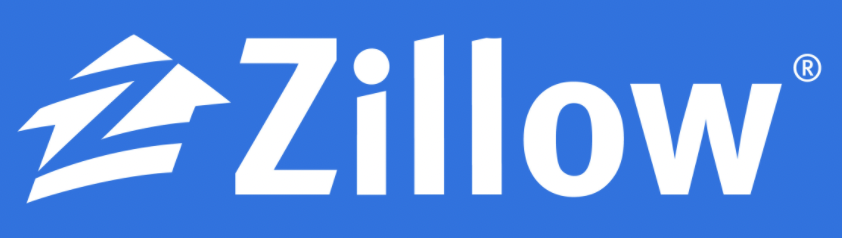

### What has brought us here today?

Log Error. Log error is based on the log of our Zestimate price minus the actual sales price of a home. But what is causing our errors? Thats what we are here to find out!

### What we hope to achieve
- Uncovering the drivers of the error in the Zestimate.
- Create recommendations on how to minimize log error.

### What we initially hypothesized
- Homes with heating systems are drivers of log error.
    - Because normally it is important but in southern California it is just nice to have but not a necessity.
- Latitude and Longitude are drivers of log error. 
    - Because one home may be in the hills, another may be on the coast, another may be in the dessert.
- Living in Los Angeles may be causing log error. 
    - Because of the majorly different economic standings within the area.

### What we ended up finding

..........

### What we learned from our findings

.........

### Our recommendation for you

..........

## Import Needed Materials

In [1]:
import wrangle

## Acquire Data

We acquire this data using the Zillow database found in the Codeup sequel server.

We joined specific tables onto our main data set (properties_2017). We also made specific parameters, within sequel, to fit our teams needs for this project.

In [2]:
df = wrangle.get_zillow_data()

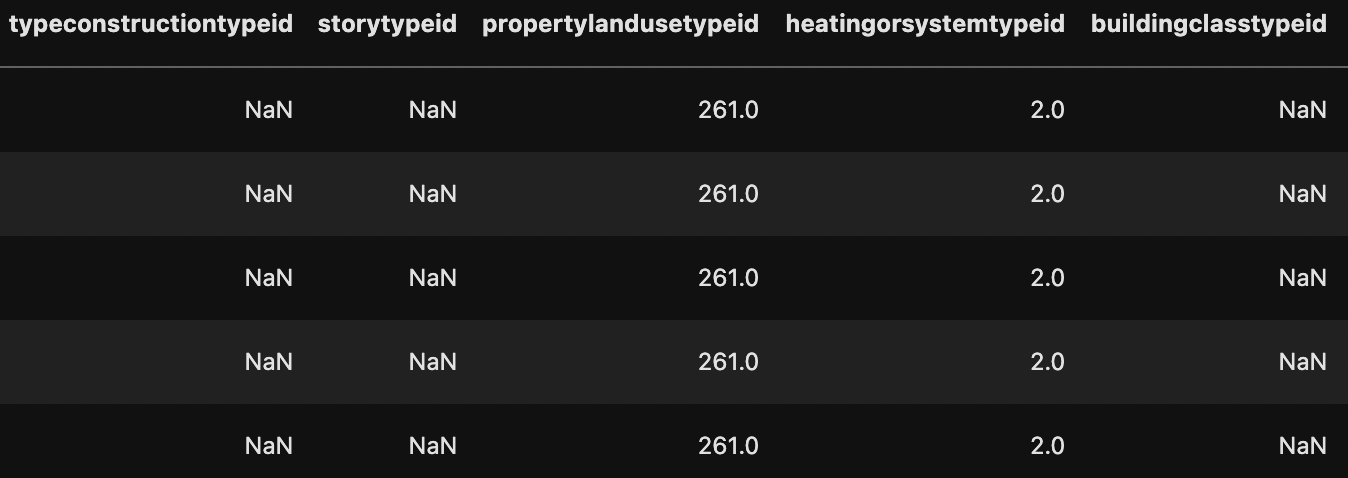

What's wrong with this?
- There are WAY to many missing values.
- The column names are sometimes too long and pushed together.
- Some columns are not helpful for what we need the data for.

## Clean the Data

In [3]:
df = wrangle.clean_zillow(df)

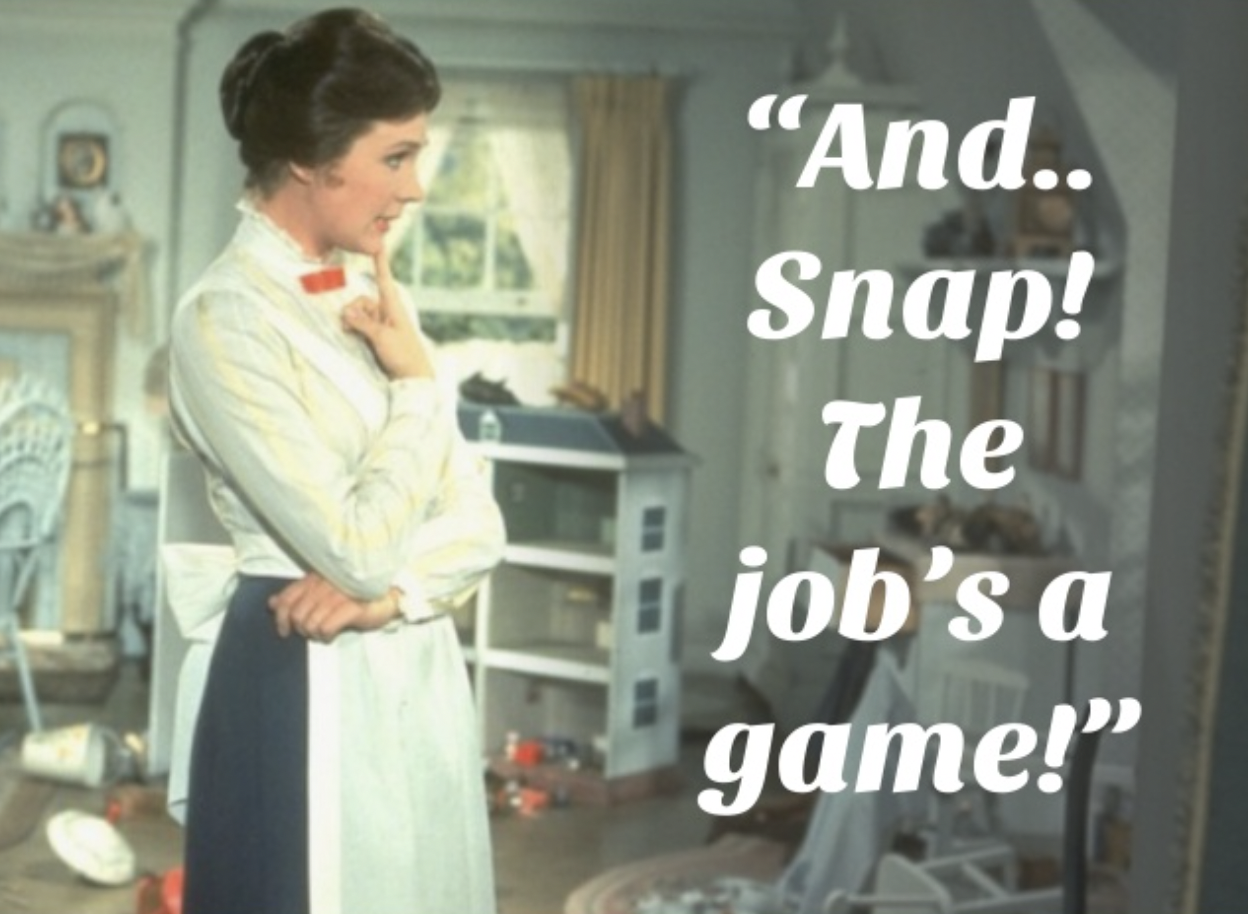

It actually wasn't as fast as a **snap**, it took some time.

In order to make the data work for us, like Ms.Poppins made the toys clean themselves, we had to put in some work.

- Here we:
    - Dop columns and rows with 50% or more null values 
    - Replace NULL values
    - Encode features
    - Create new features
    - Drop features
    - Rename features
    - Turn some features into binary features
    - Change some features to integers
    - Handle outliers
        - Using IQR rule
    - Bin some larger features

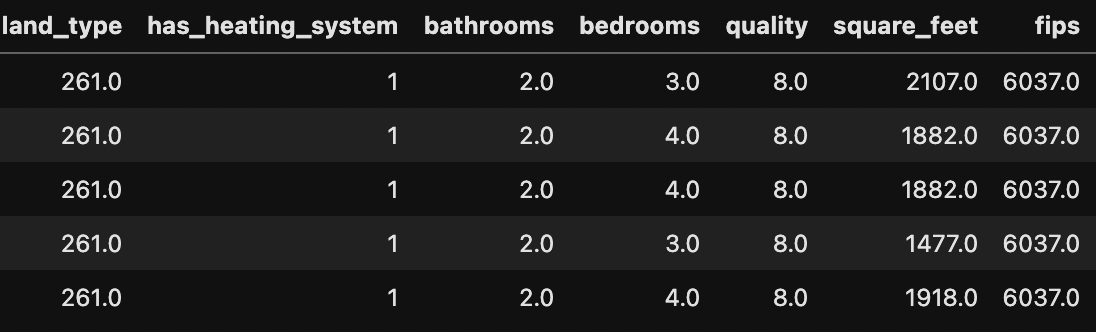

- From there we :
    - Split the data into train, validate, and test
    - Split train, validate, and test into X and y
    - Scaled the data
    
For further detail on the code used for cleaning, splitting, and scaling please see our wrangle.py found in our github repository.

In [4]:
train, validate, test = wrangle.split_zillow(df)

In [5]:
X_train, X_validate, X_test, y_train, y_validate, y_test = wrangle.split_train_validate_test(train, validate, test)

In [6]:
train_scaled, validate_scaled, test_scaled = wrangle.scale_my_data(train, validate, test)

# Let's Start Exploring!